<a href="https://colab.research.google.com/github/nourelsafty1/datavisualization/blob/main/Data_engineering_%26_visualization_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Overview:
*   The zomato dataset contains detailed information about restaurants focusing on the restaurants features (such as menu items, popular dishes, cuisines, restaurant types, availability of online ordering and availability of table booking), customer feedback (such as ratings, reviews and votes), and contact and identification details (such as phone number, name, address and url).

2.   Project goals and motivation:
*   The primary goal of the project is to discover and analyze trends and patterns in the restaurant industry and provide valuable insights, and clean the dataset by handling null values and managing outliers, and handling anomalies.






3. Research Questions:


*  How does the approximate cost for two people vary by type of listing? The objective is to understand if different listing types  are associated with specific cost ranges.

*   Are certain types of restaurants more likely to have online ordering services? The objective is to investigate if specific restaurant types are more inclined to provide online ordering.

* Are there certain types of restaurants that consistently perform better in specific locations, and how does this change by location?  The objective is to see if certain restaurant types are more successful in specific areas and to explore if location-specific preferences exist.

*  What is the distribution of the number of votes  across restaurants of different types? This will help reveal if certain types of restaurants tend to accumulate more reviews and how they compare in terms of engagement

*  What is the relationship between approximate cost for two and votes for the top 10 locations (by number of restaurants)?

* What is the relationship between restaurant ratings and the availability of table booking? Objective: To explore if allowing table reservations correlates with higher ratings or review volumes



In [ ]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Exploration
path = kagglehub.dataset_download('pranavuikey/zomato-eda')
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        filepath = os.path.join(path, filename)
        break

data = pd.read_csv(filepath)
print(data.shape)

(51717, 17)


In [ ]:
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)

Missing Values per Column:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Data Types of Each Column:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object

In [ ]:
# For 'reviews_list' and 'menu_item', the null values are placeholders []
data['menu_item'] = data['menu_item'].apply(lambda x: np.nan if x == '[]' else x)
data['reviews_list'] = data['reviews_list'].apply(lambda x: np.nan if x == '[]' else x)

missing_values = data.isnull().sum()
print("Missing Values After Conversion:")
print(missing_values)


Missing Values After Conversion:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                    7595
menu_item                      39617
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
# Identifying anomalies in 'rate'
rate_anomalies = data[~data['rate'].str.match(r'^\d+(\.\d+)?/5$', na=True)]
print("\nRows with 'rate' Anomalies (non-numeric):")
print(rate_anomalies[['url', 'rate']])


Rows with 'rate' Anomalies (non-numeric):
                                                     url    rate
72     https://www.zomato.com/bangalore/spicy-tandoor...     NEW
75     https://www.zomato.com/bangalore/om-sri-vinaya...     NEW
103    https://www.zomato.com/bangalore/floured-baked...  3.8 /5
110    https://www.zomato.com/bangalore/hari-super-sa...     NEW
130    https://www.zomato.com/bangalore/roll-magic-fa...     NEW
...                                                  ...     ...
51709  https://www.zomato.com/bangalore/the-farm-hous...  3.7 /5
51711  https://www.zomato.com/bangalore/bhagini-2-whi...  2.5 /5
51712  https://www.zomato.com/bangalore/best-brews-fo...  3.6 /5
51715  https://www.zomato.com/bangalore/chime-sherato...  4.3 /5
51716  https://www.zomato.com/bangalore/the-nest-the-...  3.4 /5

[22654 rows x 2 columns]


In [ ]:
# Converting 'approx_cost(for two people)' to string and finding anomalies
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
cost_anomalies = data[~data['approx_cost(for two people)'].str.isnumeric()]
print("\nRows with 'approx_cost(for two people)' Anomalies (non-numeric):")
print(cost_anomalies[['url', 'approx_cost(for two people)']])


Rows with 'approx_cost(for two people)' Anomalies (non-numeric):
                                                     url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
119    https://www.zomato.com/bangalore/k27-the-pub-b...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
...                                                  ...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

      approx_cost(for two people)  
67                          1,200  
119                         1,000  
166                         1,200  
207                         1,500  
217                         1,300

In [ ]:
# Identifying phone anomalies with newline characters
phone_anomalies = data[data['phone'].str.contains(r'\r\n', na=False)]
print("\nRows with Newline Characters in 'phone' (Phone Anomalies):")
print(phone_anomalies[['url', 'phone']])


Rows with Newline Characters in 'phone' (Phone Anomalies):
                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
4      https://www.zomato.com/bangalore/grand-village...   
5      https://www.zomato.com/bangalore/timepass-dinn...   
6      https://www.zomato.com/bangalore/rosewood-inte...   
7      https://www.zomato.com/bangalore/onesta-banash...   
...                                                  ...   
33616  https://www.zomato.com/bangalore/aatas-kitchen...   
33619  https://www.zomato.com/Cilantro?context=eyJzZS...   
33621  https://www.zomato.com/bangalore/chinese-fire-...   
33622  https://www.zomato.com/bangalore/pabrais-fresh...   
33623  https://www.zomato.com/bangalore/delicious-dem...   

                                  phone  
0        080 42297555\r\n+91 9743772233  
4      +91 8026612447\r\n+91 9901210005  
5      +91 9980040002\r\n+91 9980063005  
6        +91 9731716688\r\n080 26740366  
7        

In [ ]:
# Identifying empty reviews
empty_reviews = data[data['reviews_list'].str.contains(r'^\[\]$', na=False)]
print("\nRows with Empty 'reviews_list' (Anomalies):")
print(empty_reviews[['url', 'reviews_list']])


Rows with Empty 'reviews_list' (Anomalies):
Empty DataFrame
Columns: [url, reviews_list]
Index: []


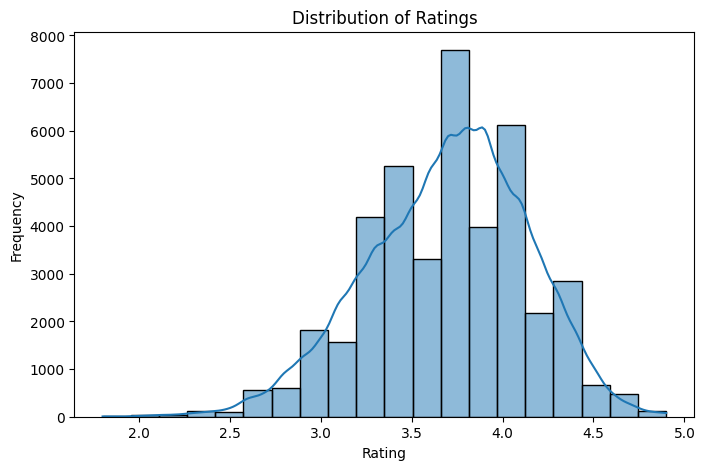

In [ ]:
#Data Visualization Before Cleaning
#1. using a histogram to visualize the ratings distribution
# Converts all entries in 'rate' to strings, then replace 'NEW' with NaN and remove '/5'
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].replace('NEW', None)
data['rate'] = data['rate'].str.replace('/5', '', regex=False)

# Converts to numeric, with errors='coerce' to handle any remaining non-numeric values
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

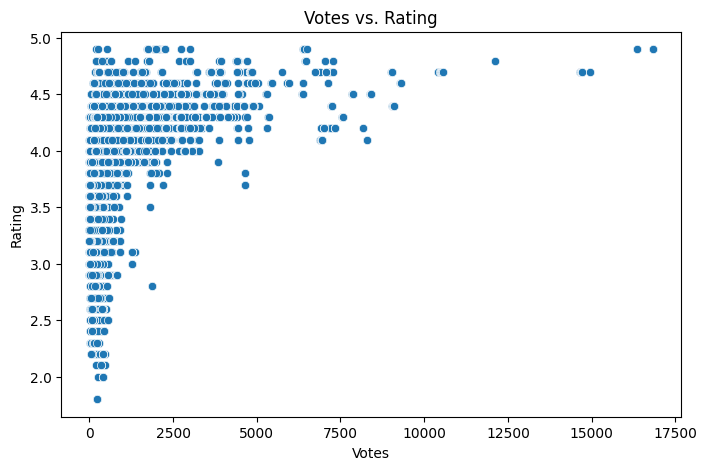

In [ ]:
#2. Scatter Plot To help uncover a relationship between votes and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='votes', y='rate')
plt.title("Votes vs. Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

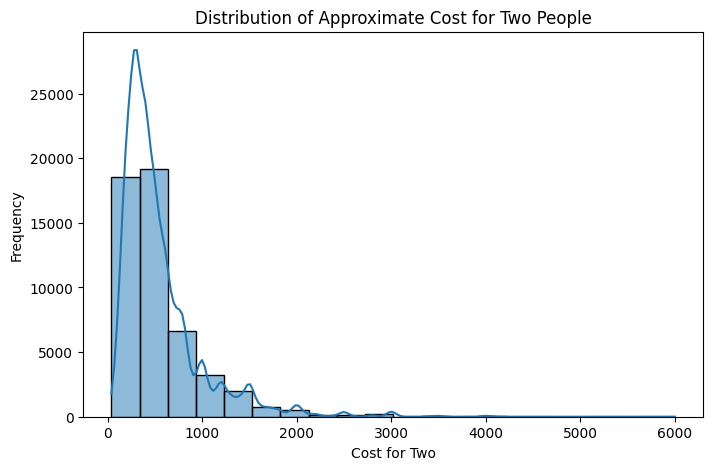

In [ ]:
#3. Histogram for 'approx_cost(for two people)'
# Ensures all entries in 'approx_cost(for two people)' are strings
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)

# Removes commas and convert the column to numeric, setting non-numeric values to NaN
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['approx_cost(for two people)'].dropna(), bins=20, kde=True)
plt.title("Distribution of Approximate Cost for Two People")
plt.xlabel("Cost for Two")
plt.ylabel("Frequency")
plt.show()

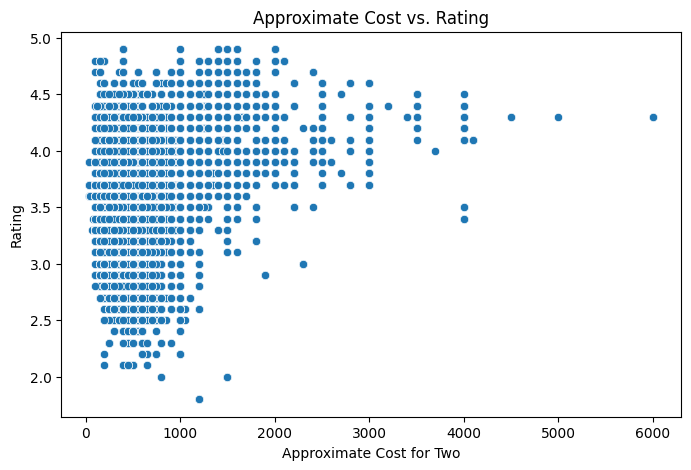

In [ ]:
# 4.Scatter Plot for Cost vs Rating to see if there is a relationship between cost and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='approx_cost(for two people)', y='rate')
plt.title("Approximate Cost vs. Rating")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Rating")
plt.show()

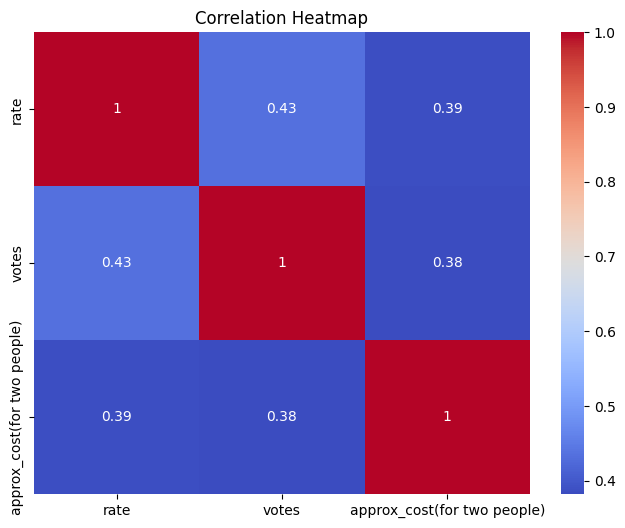

In [ ]:
 #5. Correlation heatmap (only numerical columns to visualize  correlations in numerical data)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['rate', 'votes', 'approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

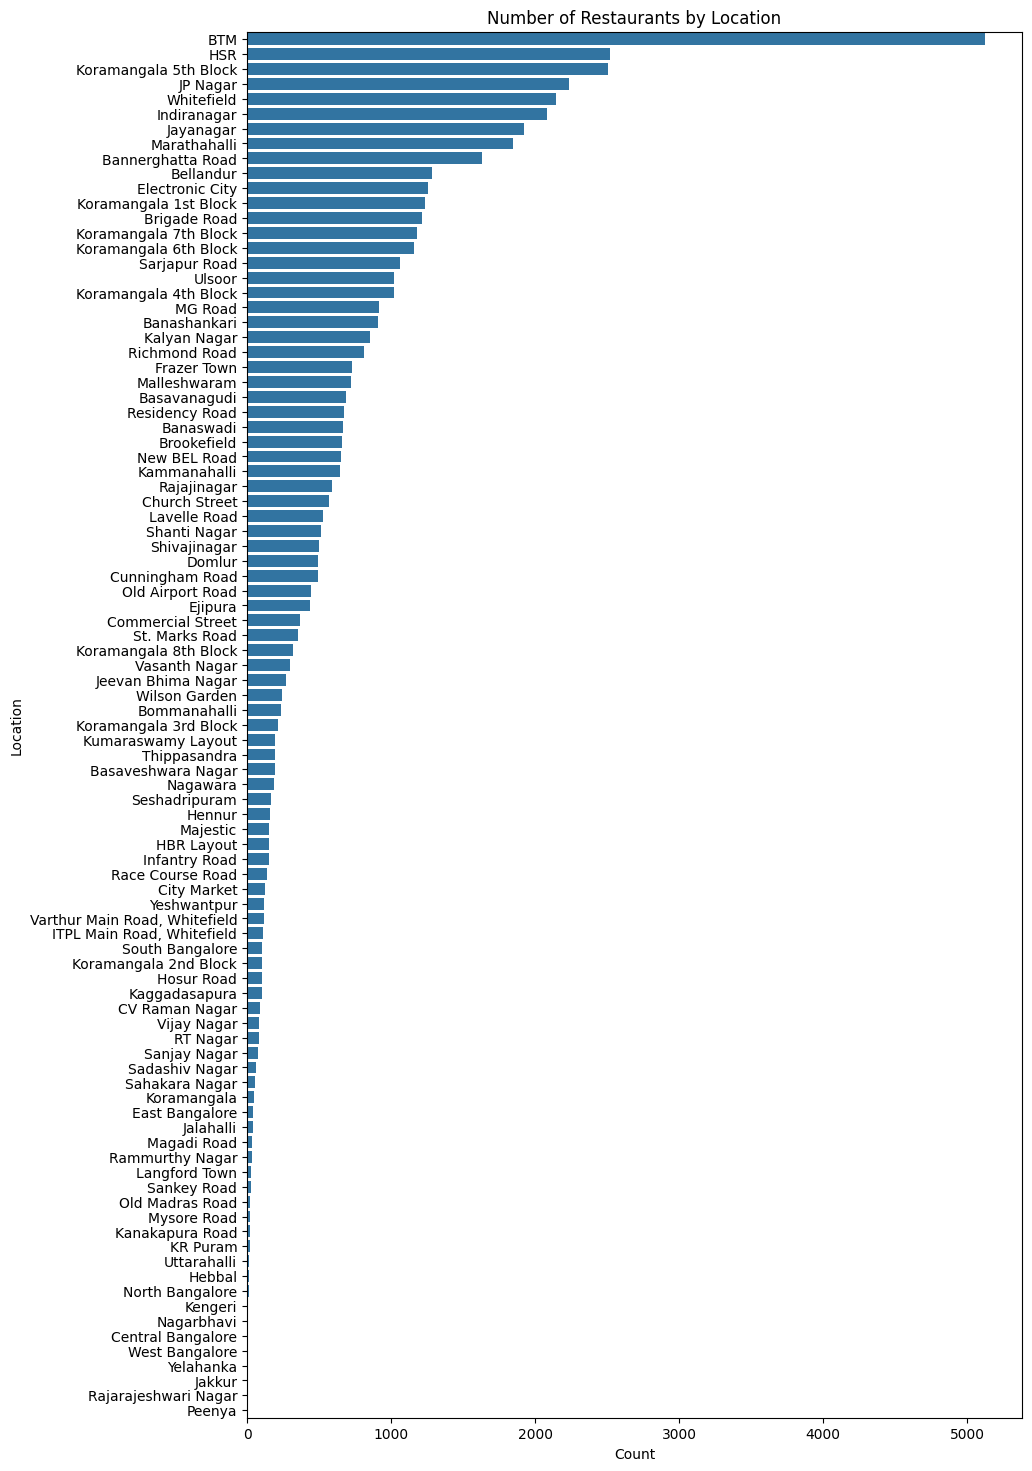

In [ ]:
#6. Count of restaurants in each location
plt.figure(figsize=(10,18))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title("Number of Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

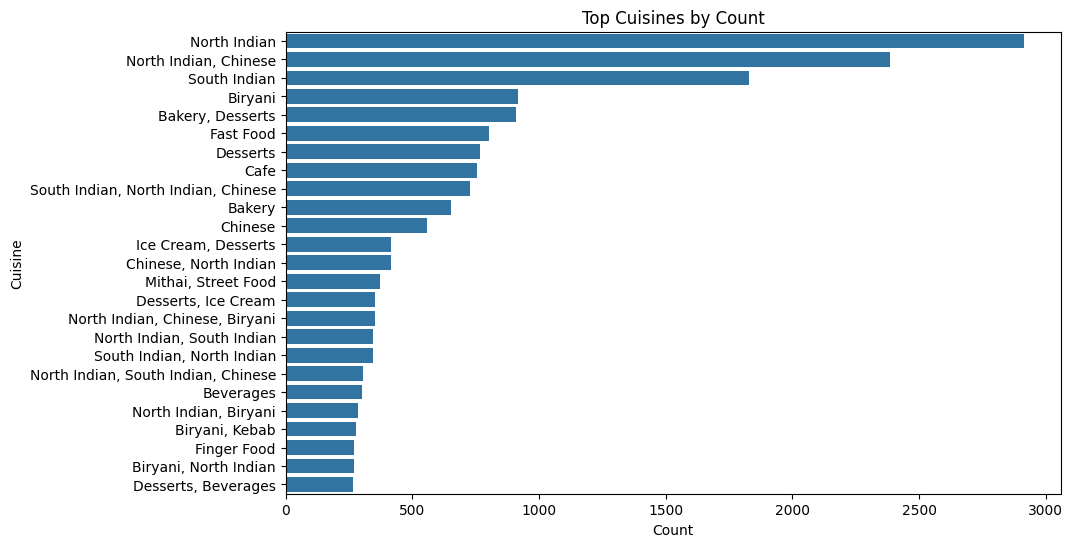

In [ ]:
#7. Count of restaurants by cuisine type
plt.figure(figsize=(10, 6))
top_cuisines = data['cuisines'].value_counts().head(25)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top Cuisines by Count")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

In [ ]:
# Data Cleaning
# Handles anomalies in 'rate' column
data['rate'] = data['rate'].replace('NEW', 'NaN')
# 'NEW' isn't a valid numeric rating, so we treat it as missing data (NaN) to clean up the column.

data['rate'] = data['rate'].astype(str)
# Converts everything in the 'rate' column to strings. to ensures we can safely apply string operations like extracting specific patterns.

data['rate'] = data['rate'].str.extract('(\d+\.\d+)')
# Extracting only the numeric rating (e.g., "4.5") from the strings, ignoring any extra text or invalid formats.

data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
# Converts the cleaned numeric strings into proper numbers. If any value can't be converted (e.g., still invalid), it gets replaced with NaN.

# Handling missing values
data['rate'] = data['rate'].fillna(data['rate'].median())  # Imputes NaN with median as it doesn't get affected with outliers or data skew as the mean

In [ ]:
# Handling anomalies in 'approx_cost(for two people)' column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].replace(',', '', regex=True)
# Removes commas from the cost values so they can be converted into proper numbers (e.g ,"1,000" becomes "1000").

data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')
# Makes sure all values in this column are numbers in the case that something can’t be converted (like text), it’s replaced with NaN.

data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median())
# Fills in any missing values with the median cost as it doesn't get affected with outliers or data skew as the mean


In [ ]:
# Handling anomalies in 'phone' column
data['phone'] = data['phone'].str.replace(r'\r\n', ' ', regex=True)
# Replaces newline characters with spaces to make phone numbers easier to read and keep them on a single line.

# Handling missing values
data['phone'] = data['phone'].fillna("Unknown")
 # Assigns 'Unknown' to missing phone values as we can't just assign another value to someone's missing phone number as it will be incorrect

In [ ]:
# Dropping The 'reviews_list' column as it's causing a lot of formatting error in the entire file
data =data.drop(columns=['reviews_list'])

In [ ]:
data =data.drop(columns=['menu_item'])

In [ ]:
# Handling missing values in the rest of the columns
data['location'] = data['location'].fillna(data['location'].mode()[0])  # Mode imputation for location since it's a categorical value
data['rest_type'] = data['rest_type'].fillna(data['rest_type'].mode()[0])  # Mode imputation for rest_type since it's a categorical value
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode()[0])  # Mode imputation for cuisines since it's a categorical value
data['dish_liked'] = data['dish_liked'].fillna(data['dish_liked'].mode()[0])  # Mode imputation for dish_liked since it's a categorical value
print("Missing Values per Column:\n", data.isnull().sum())
print("Data Types of Each Column:\n", data.dtypes)


Missing Values per Column:
 url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64
Data Types of Each Column:
 url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisine

In [ ]:
# Cleaning and formatting the 'rest_type' column
data['rest_type'] = data['rest_type'].str.lower().str.strip()
# Convert all text to lowercase for consistency and remove any extra spaces around the values.

data['rest_type'].nunique()
By running data['rest_type'].unique(),
# By running this command we identified all the distinct types of restaurants. There were 93 unique values, including combinations like "cafe, quick bites" and variants like "dessert parlor, bakery."
data['rest_type'].unique()
# Display all unique values to understand the variations and create a mapping for standardization.

standardized_values = [
    'casual dining', 'cafe', 'quick bites', 'delivery', 'mess', 'dessert parlor', 'bakery',
    'pub', 'takeaway', 'fine dining', 'beverage shop', 'sweet shop', 'bar', 'confectionery',
    'kiosk', 'food truck', 'microbrewery', 'lounge', 'food court', 'dhaba', 'club', 'pop up', 'irani cafe'
]
# We grouped similar categories based on their focus, like dining experience (e.g., "casual dining")
# food specialty (e.g., "dessert parlor"), service type (e.g., "delivery"),
# and unique concepts (e.g., "food truck"). Then, we selected 23 standardized categories to simplify the data while preserving key distinctions.
# We mapped original values to these categories, handling combined or unclear categories by choosing the dominant type (e.g., "cafe, quick bites" becomes "quick bites" because quick bites refers to fast, casual food service, which is the primary focus over the more relaxed atmosphere of a cafe).
#  Unique or ambiguous cases, like "irani cafe," were kept as-is for clarity.


# Mapping the original values to the standardized ones
mapping = {
    'casual dining': 'casual dining',
    'cafe, casual dining': 'casual dining',
    'quick bites': 'quick bites',
    'casual dining, cafe': 'casual dining',
    'cafe': 'cafe',
    'quick bites, cafe': 'quick bites',
    'cafe, quick bites': 'quick bites',
    'delivery': 'delivery',
    'mess': 'mess',
    'dessert parlor': 'dessert parlor',
    'bakery, dessert parlor': 'bakery',
    'pub': 'pub',
    'bakery': 'bakery',
    'takeaway, delivery': 'takeaway',
    'fine dining': 'fine dining',
    'beverage shop': 'beverage shop',
    'sweet shop': 'sweet shop',
    'bar': 'bar',
    'beverage shop, quick bites': 'beverage shop',
    'confectionery': 'confectionery',
    'quick bites, beverage shop': 'quick bites',
    'dessert parlor, sweet shop': 'dessert parlor',
    'bakery, quick bites': 'bakery',
    'sweet shop, quick bites': 'sweet shop',
    'kiosk': 'kiosk',
    'food truck': 'food truck',
    'quick bites, dessert parlor': 'quick bites',
    'beverage shop, dessert parlor': 'beverage shop',
    'takeaway': 'takeaway',
    'pub, casual dining': 'casual dining',
    'casual dining, bar': 'casual dining',
    'dessert parlor, beverage shop': 'dessert parlor',
    'quick bites, bakery': 'quick bites',
    'dessert parlor, quick bites': 'dessert parlor',
    'microbrewery, casual dining': 'microbrewery',
    'lounge': 'lounge',
    'bar, casual dining': 'casual dining',
    'food court': 'food court',
    'cafe, bakery': 'cafe',
    'dhaba': 'dhaba',
    'quick bites, sweet shop': 'sweet shop',
    'microbrewery': 'microbrewery',
    'food court, quick bites': 'food court',
    'pub, bar': 'pub',
    'casual dining, pub': 'casual dining',
    'lounge, bar': 'lounge',
    'food court, dessert parlor': 'food court',
    'casual dining, sweet shop': 'sweet shop',
    'food court, casual dining': 'food court',
    'casual dining, microbrewery': 'casual dining',
    'sweet shop, dessert parlor': 'sweet shop',
    'bakery, beverage shop': 'bakery',
    'lounge, casual dining': 'lounge',
    'cafe, food court': 'food court',
    'beverage shop, cafe': 'cafe',
    'cafe, dessert parlor': 'cafe',
    'dessert parlor, cafe': 'dessert parlor',
    'dessert parlor, bakery': 'bakery',
    'microbrewery, pub': 'microbrewery',
    'bakery, food court': 'food court',
    'club': 'club',
    'quick bites, food court': 'quick bites',
    'bakery, cafe': 'bakery',
    'bar, cafe': 'bar',
    'pub, cafe': 'pub',
    'casual dining, irani cafe': 'irani cafe',
    'fine dining, lounge': 'fine dining',
    'bar, quick bites': 'quick bites',
    'bakery, kiosk': 'bakery',
    'pub, microbrewery': 'microbrewery',
    'microbrewery, lounge': 'microbrewery',
    'fine dining, microbrewery': 'fine dining',
    'fine dining, bar': 'fine dining',
    'mess, quick bites': 'quick bites',
    'dessert parlor, kiosk': 'dessert parlor',
    'bhojanalya': 'mess',
    'casual dining, quick bites': 'casual dining',
    'pop up': 'pop up',
    'cafe, bar': 'cafe',
    'casual dining, lounge': 'casual dining',
    'bakery, sweet shop': 'bakery',
    'microbrewery, bar': 'microbrewery',
    'cafe, lounge': 'cafe',
    'bar, pub': 'pub',
    'lounge, cafe': 'lounge',
    'club, casual dining': 'club',
    'quick bites, mess': 'quick bites',
    'quick bites, meat shop': 'quick bites',
    'quick bites, kiosk': 'quick bites',
    'lounge, microbrewery': 'microbrewery',
    'food court, beverage shop': 'food court',
    'dessert parlor, food court': 'food court',
    'bar, lounge': 'bar'
}
# Apply the mapping to standardize all values in the 'rest_type' column
data['rest_type'] = data['rest_type'].map(mapping)


In [ ]:
# IQR was chosen as we don't know the distribution of the data and there's also multiple data types which makes IQR the best fit to determine outliers and handle them
Q1 = data.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = data.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

outliers_iqr = (data.select_dtypes(include=['float64', 'int64']) < min) | (data.select_dtypes(include=['float64', 'int64']) > max)

outlier_rows = data[outliers_iqr.any(axis=1)]
print("Outliers based on IQR method:\n", outlier_rows)

data_cleaned = data[~outliers_iqr.any(axis=1)]
print("Cleaned Dataframe without outliers:\n", data_cleaned)

Outliers based on IQR method:
                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
7      https://www.zomato.com/bangalore/onesta-banash...   
9      https://www.zomato.com/bangalore/smacznego-ban...   
...                                                  ...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
7      2

In [ ]:
print(data.shape)

(51717, 15)


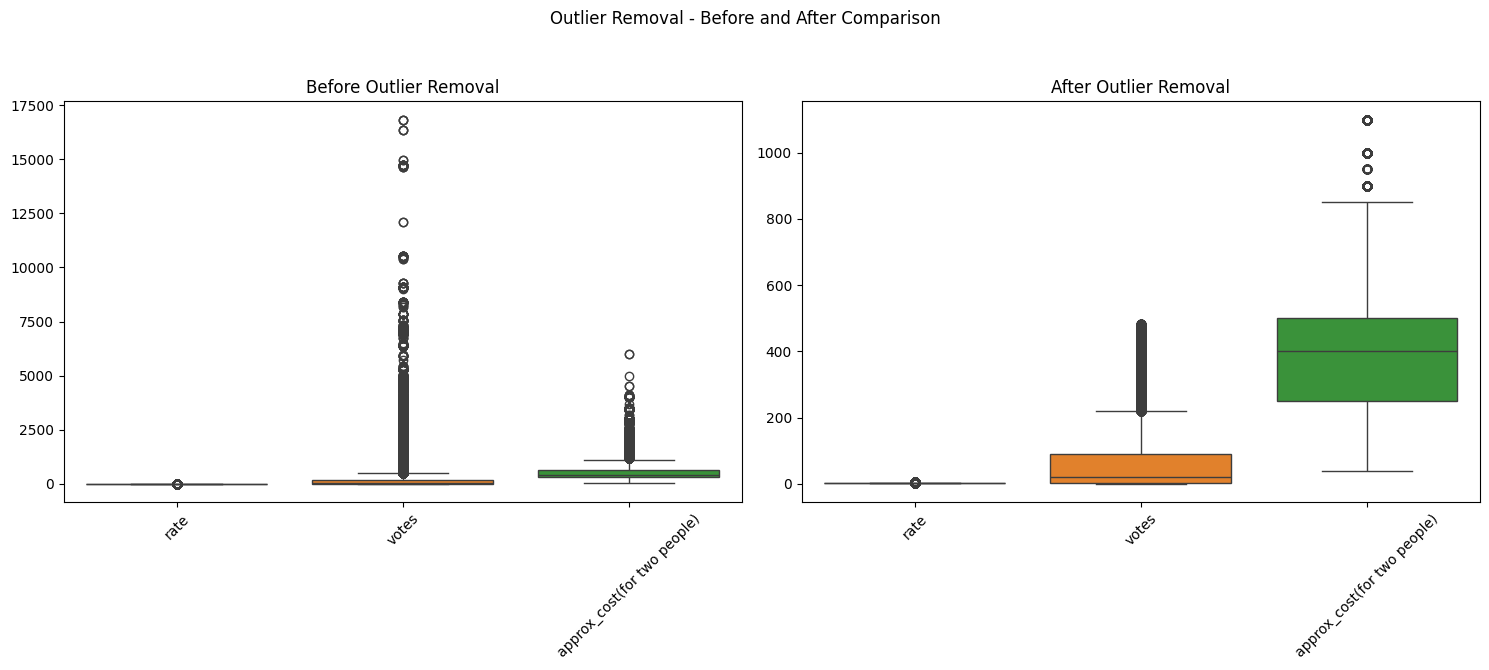

In [ ]:
# Data Visualization After Data Cleaning
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.suptitle("Outlier Removal - Before and After Comparison")

# Box plot before removing outliers
sns.boxplot(data=data[numerical_cols], ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].tick_params(axis='x', rotation=45)

# Box plot after removing outliers
sns.boxplot(data=data_cleaned[numerical_cols], ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Research questions

Research question #1. How does the approximate cost for two people vary by type of listing? The objective is to understand if different listing types  are associated with specific cost ranges.

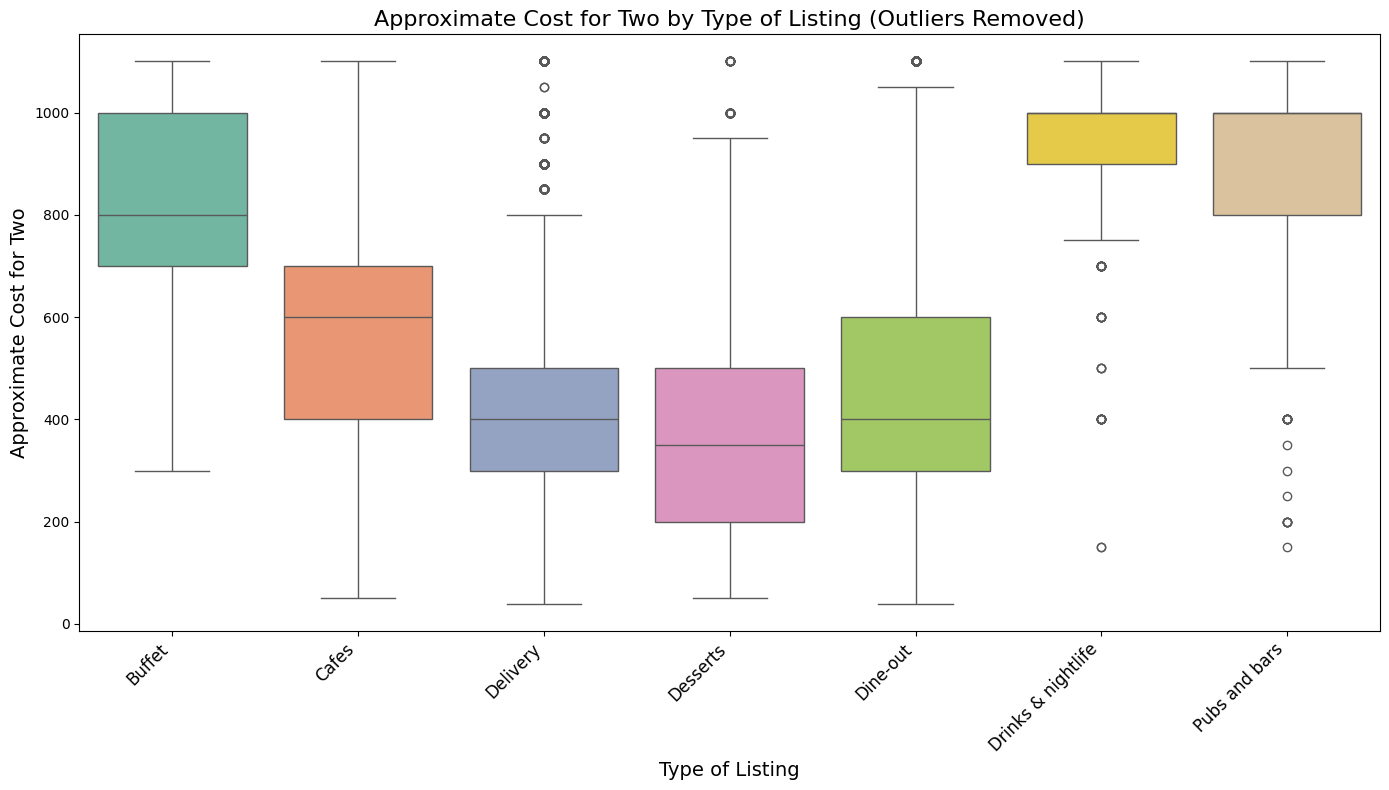

In [ ]:
Q1 = data['approx_cost(for two people)'].quantile(0.25)
Q3 = data['approx_cost(for two people)'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['approx_cost(for two people)'] >= (Q1 - 1.5 * IQR)) &
                     (data['approx_cost(for two people)'] <= (Q3 + 1.5 * IQR))]
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='listed_in(type)', y='approx_cost(for two people)' ,hue='listed_in(type)', palette='Set2', dodge=False, legend=False)
plt.title('Approximate Cost for Two by Type of Listing (Outliers Removed)', fontsize=16)
plt.xlabel('Type of Listing', fontsize=14)
plt.ylabel('Approximate Cost for Two', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Why boxplot -> it effectively visualizes the distribution of the approximate cost for two in different listing types. It shows the range, median, and spread of the approximate cost for each listing type effectively.


Research Question #1 Analysis:

The boxplot shows the variation in approximate costs for two people across different types of listings. Buffet-style listings show a high median cost, while desserts and delivery options have a lower median cost. The biggest spread in costs is observed in pubs and bars, indicating a mix of lower costs and higher costs. Cafes and dine-out listings show a moderate range of costs, with cafes skewing towards slightly higher medians than desserts or delivery listings.

Research Question #2.
 Are certain types of restaurants more likely to have online ordering services? The objective is to investigate if specific restaurant types are more inclined to provide online ordering.


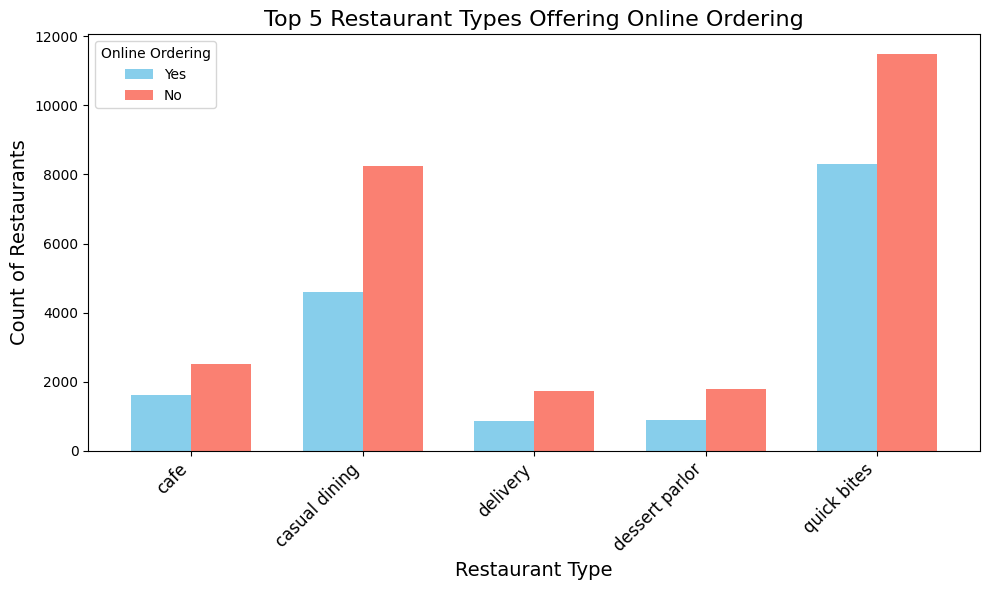

In [ ]:
rest_type_counts = data['rest_type'].value_counts()
# Top 5 most common restaurant types
top_5_rest_types = rest_type_counts.head(5).index
filtered_data = data[data['rest_type'].isin(top_5_rest_types)]
grouped_data = filtered_data.groupby(['rest_type', 'online_order']).size().unstack(fill_value=0)
grouped_data.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    color=['skyblue', 'salmon'],
    width=0.7
)
plt.title('Top 5 Restaurant Types Offering Online Ordering', fontsize=16)
plt.xlabel('Restaurant Type', fontsize=14)
plt.ylabel('Count of Restaurants', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Online Ordering', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

Why barchart ->  It clearly shows the relationship between restaurant types and their likelihood of offering online ordering, rest_type and online_order are both categorical variables the bar chart has effectively compared the count of restaurants offering online ordering across different restaurant types.

Research Question #2 Analysis:
While online ordering is available in some listings, the overall trend shows that in many restaurants online ordering is not available so there is no strong relationship between the listing type and online order availability.

Research Question #3.	Are there certain types of restaurants that consistently perform better in specific locations, and how does this change by location?  The objective is to see if certain restaurant types are more successful in specific areas and to explore if location-specific preferences exist.

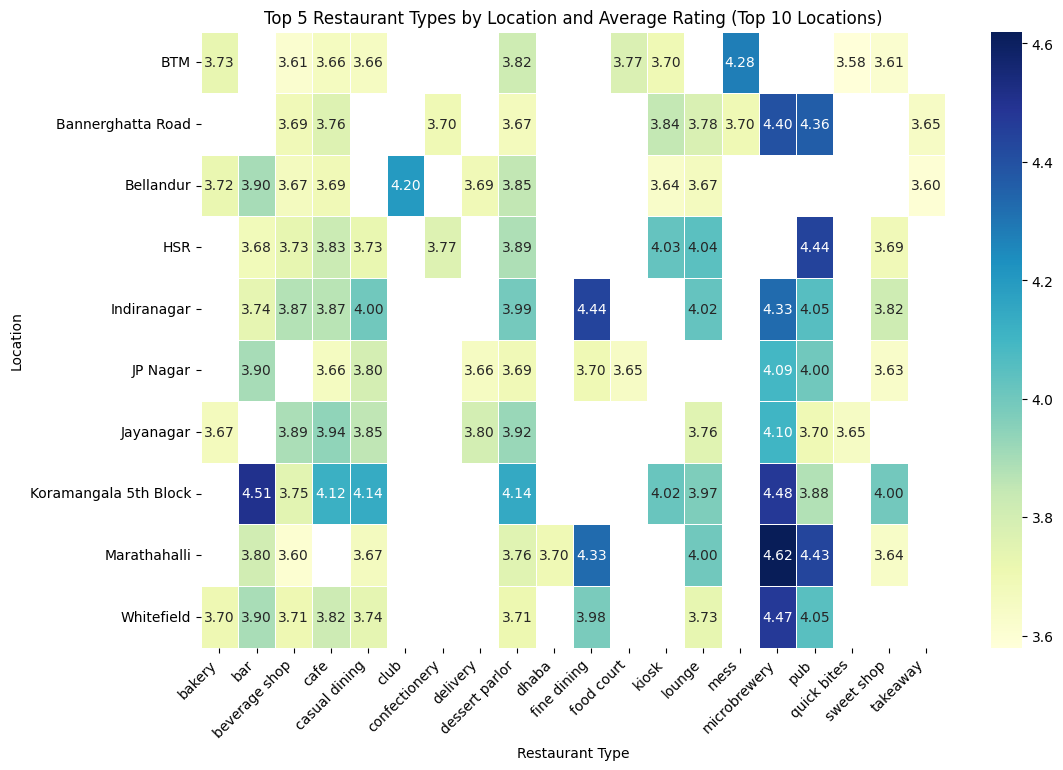

In [ ]:
top_locations = data['location'].value_counts().head(10).index
filtered_data = data[data['location'].isin(top_locations)]
avg_rating_by_location_type = filtered_data.groupby(['location', 'rest_type'])['rate'].mean().reset_index()
avg_rating_by_location_type = avg_rating_by_location_type.sort_values(by=['location', 'rate'], ascending=[True, False])
top_n_types = 10
top_avg_rating_by_location_type = avg_rating_by_location_type.groupby('location').head(top_n_types)
heatmap_data = top_avg_rating_by_location_type.pivot(index='location', columns='rest_type', values='rate')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
plt.title("Top 5 Restaurant Types by Location and Average Rating (Top 10 Locations)")
plt.xlabel("Restaurant Type")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.show()


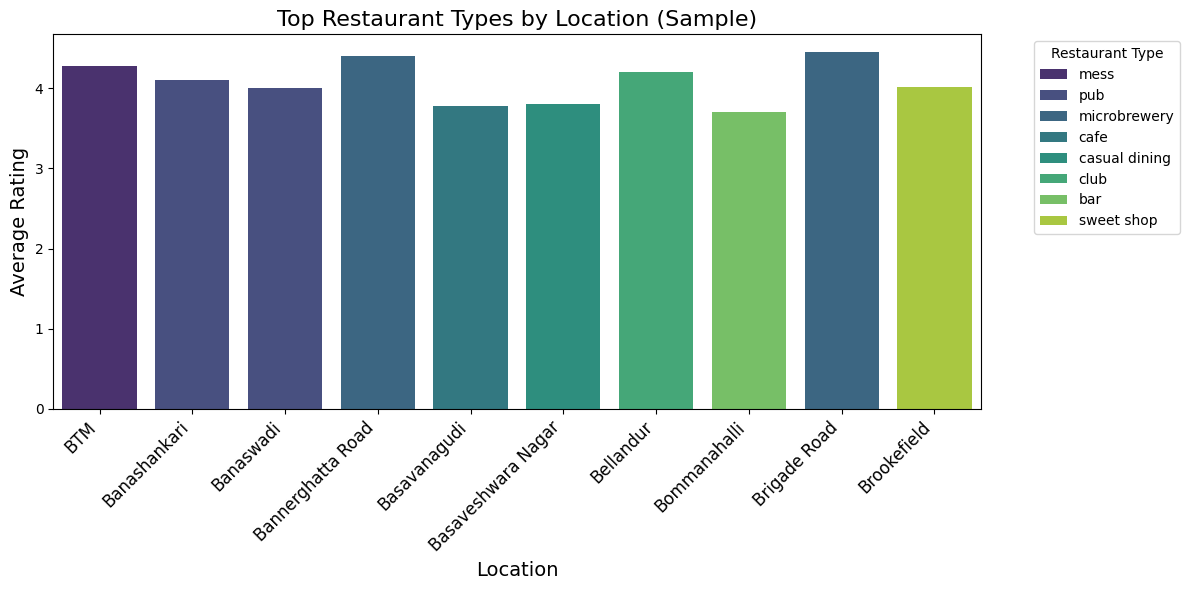

In [ ]:
type_location_ratings = data.groupby(['location', 'rest_type'])['rate'].mean().reset_index()
top_types_by_location = type_location_ratings.sort_values(['location', 'rate'], ascending=[True, False]).groupby('location').head(1)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rate', hue='rest_type', data=top_types_by_location.head(10), palette='viridis')
plt.title('Top Restaurant Types by Location (Sample)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question #3 Analysis:

Why heatmap -> A heatmap can show the average ratings of restaurant types across multiple locations at once. The intensity of colors make it easy to visualize which combinations perform well or poorly.

Heatmap Analysis:
The heatmap shows clear preferences for certain restaurant types in certain locations. For example, microbreweries and fine dining consistently achieve higher ratings in areas like Koramangala 5th Block, Indiranagar, and Whitefield.
Casual dining maintains semi-high ratings across certain areas.

Why bar plot -> The bar plot is just solidifying what the heatmap has shown, it may be easier to interpret.

Bar Plot Analysis:
Locations such as Brigade Road, Bannerghatta Road, Banaswadi and Banashankari prefer options such as microbreweries and pubs.

Overall Observation:
The plots shown above suggest that location based preferences do in fact exist with different types of restaurants being preferred in certain areas.

**-)Question-4**

 What is the distribution of the number of votes  across restaurants of different types? This will help reveal if certain types of restaurants tend to accumulate more reviews and how they compare in terms of engagement

<ipython-input-118-9e5764c3e7e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


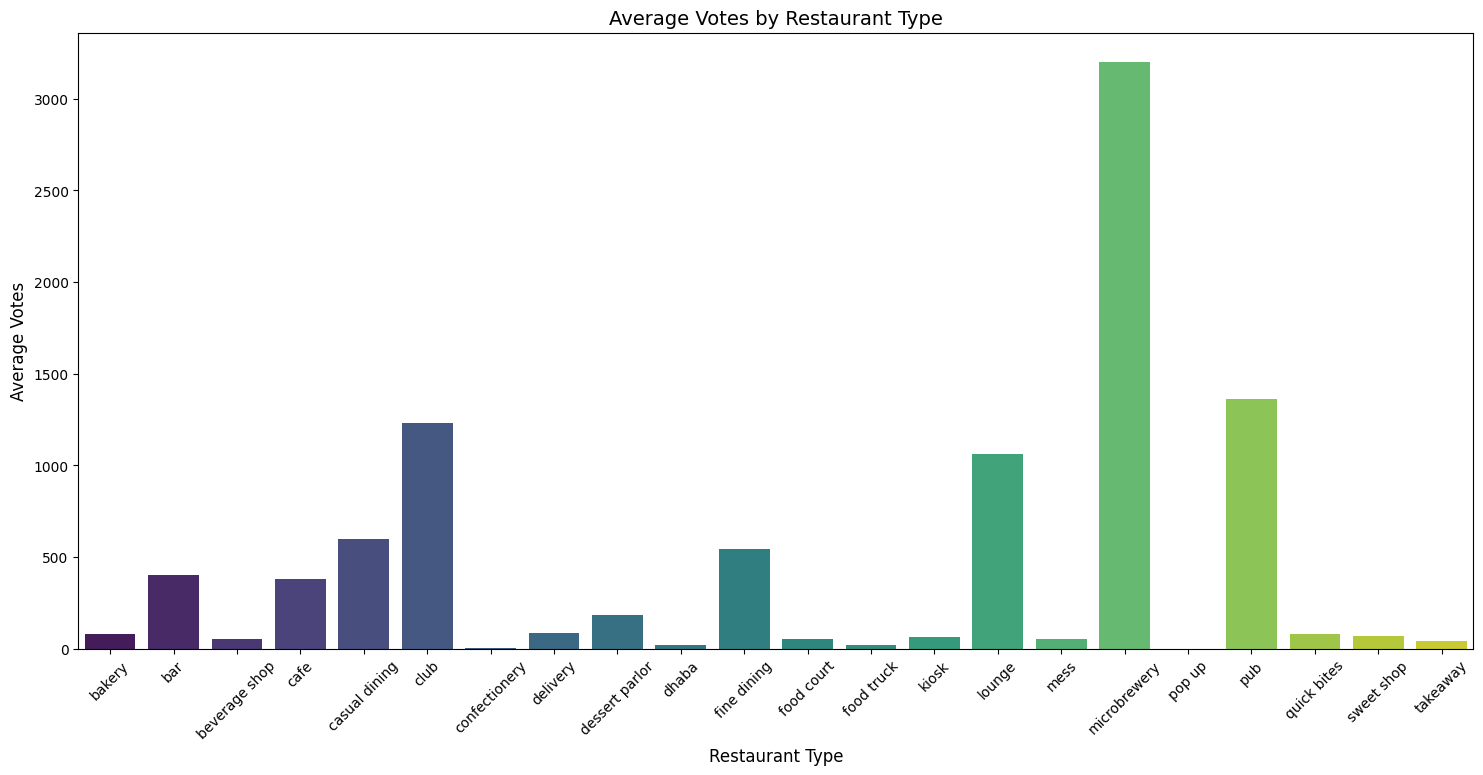

In [ ]:
# Compute average votes for each restaurant type
average_votes = data.groupby("rest_type")["votes"].mean().reset_index()
average_votes = average_votes.rename(columns={"votes": "average_votes"})

# Create the bar chart
plt.figure(figsize=(18, 8))
sns.barplot(
    data=average_votes,  # Use the aggregated DataFrame
    x="rest_type",
    y="average_votes",
    palette="viridis"
)

# Add title and labels
plt.title("Average Votes by Restaurant Type", fontsize=14)
plt.xlabel("Restaurant Type", fontsize=12)
plt.ylabel("Average Votes", fontsize=12)
plt.xticks(rotation=45)
plt.show()


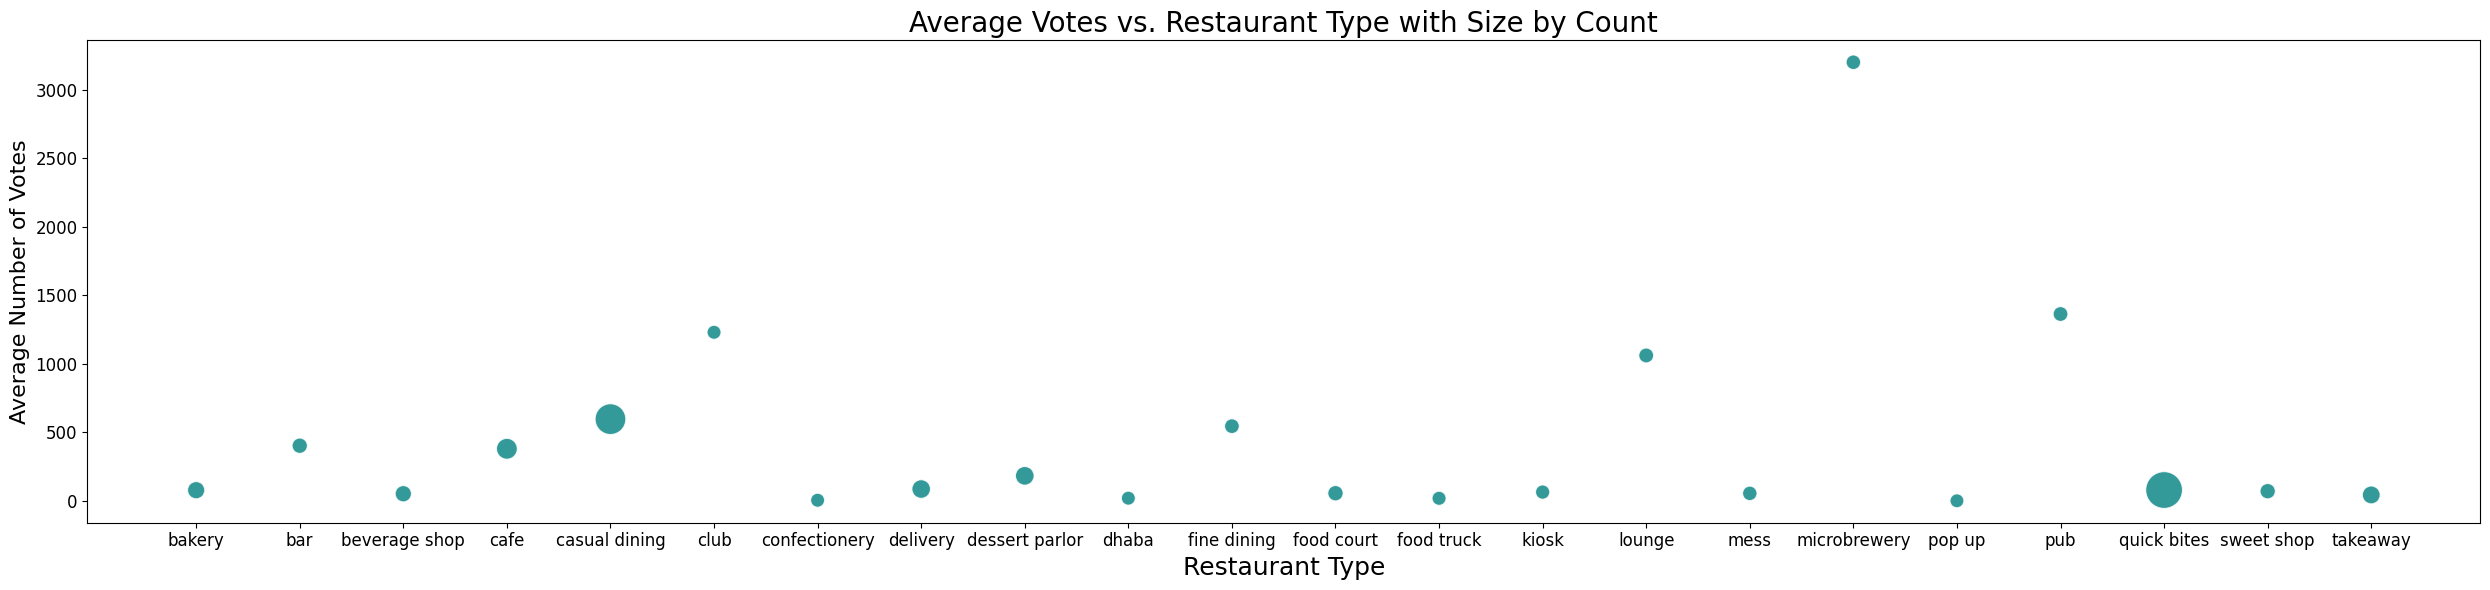

In [ ]:
# Aggregating data for the bubble chart
bubble_data = data.groupby('rest_type').agg(
    avg_votes=('votes', 'mean'),
    count=('rest_type', 'size')
).reset_index()

# Plotting the bubble chart using scatterplot
plt.figure(figsize=(25, 6))
sns.scatterplot(
    data=bubble_data,
    x='rest_type',
    y='avg_votes',
    size='count',
    sizes=(100, 700),
    alpha=0.8,
    legend=False,
    color='teal'
)

plt.title('Average Votes vs. Restaurant Type with Size by Count', fontsize=20)
plt.xlabel('Restaurant Type', fontsize=18)
plt.ylabel('Average Number of Votes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**BarPlot :**

- shows that microbreweries , clubs and pubs, these restaurant types have the highest average votes in the chart, and shows that pop up , confectionery and dhaba have the lowest average votes in the chart

**Bubble Plot :**

- Microbrewery have the highest average number of votes, confirming barplot chart, also shows that microbrewery have low count of resturants

- Quick Bites have a high count of restaurants but fewer average votes.

**-It allows for insights into engagement trends:**

- High average votes are often associated with fewer, more specialized restaurants

**Insights:**

- The bar plot shows that restaurant types with highest average votes , and bubble plot highlights how different restaurant types compare in terms of both average votes and the number of restaurants.

- Overall the analysis shows patterns in customer interest across different restaurant types.







**-)Question-5**

 What is the relationship between approximate cost for two and votes for the top 10 locations (by number of restaurants)?

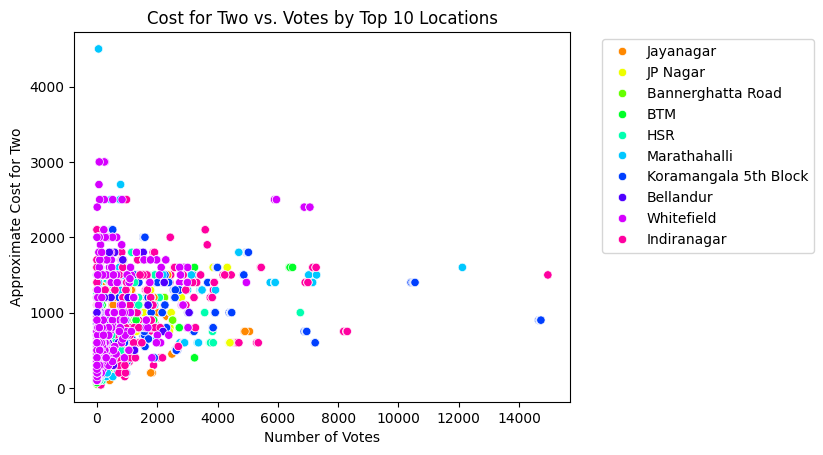

In [ ]:
# Top 10 locations i.e locations with the highest number of resturants
top_locations = data['location'].value_counts().head(10).index
filtered_data = data[data['location'].isin(top_locations)]
num_locations = len(top_locations)
palette = sns.color_palette("hsv", num_locations)
sns.scatterplot(x="votes", y="approx_cost(for two people)", hue="location", data=filtered_data, palette=palette)
plt.title("Cost for Two vs. Votes by Top 10 Locations")
plt.xlabel("Number of Votes")
plt.ylabel("Approximate Cost for Two")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Question 5 insights -> After analyzing the scatter plot I could tell that restaurants with lower approximate costs for two(around 500$ to $1500) receive more votes, which indicates that affordability is a big factor in resturant popularity.
High-cost restaurants with aproximate cost for two >2000 are less popular overall and have lower votes.


**-)Question-6**
What is the relationship between restaurant ratings and the availability of table booking? Objective: To explore if allowing table reservations correlates with higher ratings or review volumes

<Axes: xlabel='book_table', ylabel='rate'>

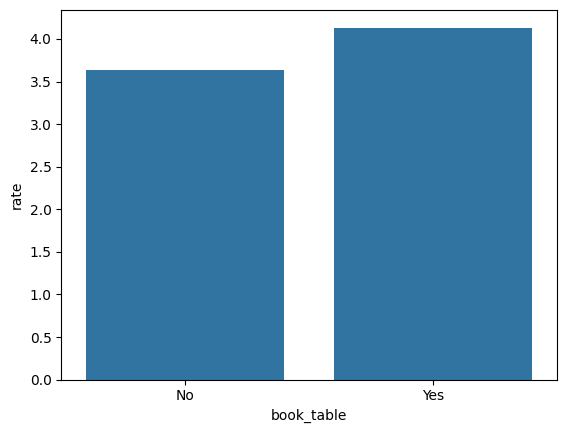

In [ ]:
#Group by 'table_booking' and calculate the mean rating for each group
average_ratings = data.groupby("book_table")["rate"].mean().reset_index()


#Create the bar plot
sns.barplot(
    x="book_table",
    y="rate",
    data=average_ratings,
    legend=False  # Legend is not needed as there's no hue
)


<Axes: xlabel='book_table', ylabel='rate'>

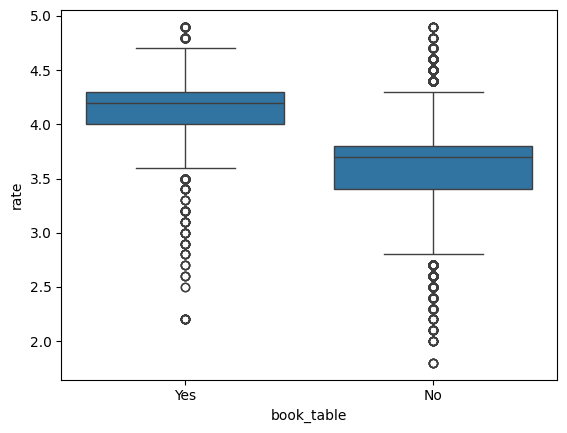

In [ ]:
#Create a box plot to display the distribution of ratings by table booking availability
sns.boxplot(
    x="book_table",
    y="rate",
    data=data
)

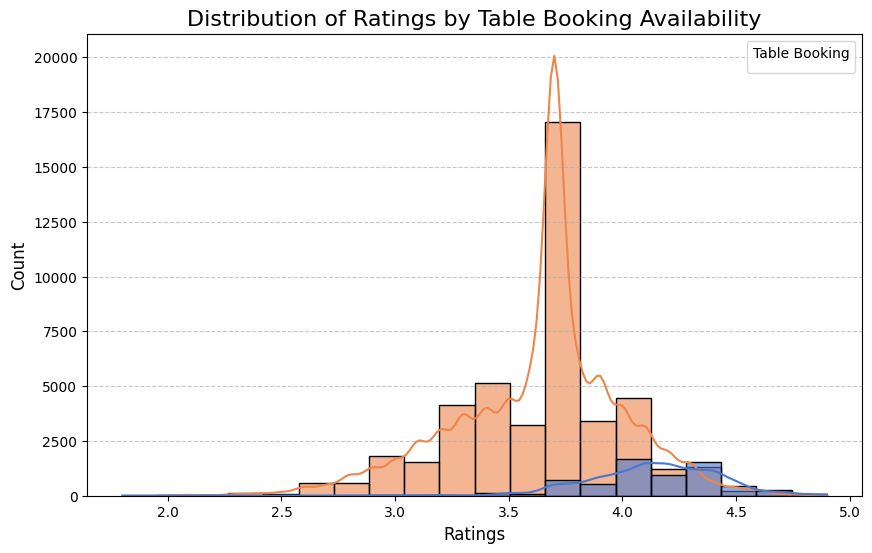

In [ ]:
data = data[data["rate"].notnull()]
data["rate"] = pd.to_numeric(data["rate"], errors="coerce")
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data,
    x="rate",
    hue="book_table",
    kde=True,
    palette="muted",
    bins=20,
    alpha=0.6,
)
plt.title("Distribution of Ratings by Table Booking Availability", fontsize=16)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Table Booking")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### **BarPlot Insight:**

**Ratings for Restaurants With Table Booking (Yes):**


- restaurants offering table booking have a higher mean rating.


**Ratings for Restaurants Without Table Booking (No):**

- The average rating for restaurants that do not allow table bookings is lower compared to those that do.


### **BoxPlot Insight:**



**Ratings for Restaurants with Table Booking (Yes):**

- There are a few outliers below rating (3.5) , but the overall ratings closer to the upper range.

**Ratings for Restaurants without Table Booking (No):**

- There are more outliers above (4.5) and below (3.0), but the overall ratings is closer to the middle range.


### **Insight:**

- Beside the outliers the data suggests that restaurants offering table reservations lead to receive higher and more consistent ratings compared to those that do not.